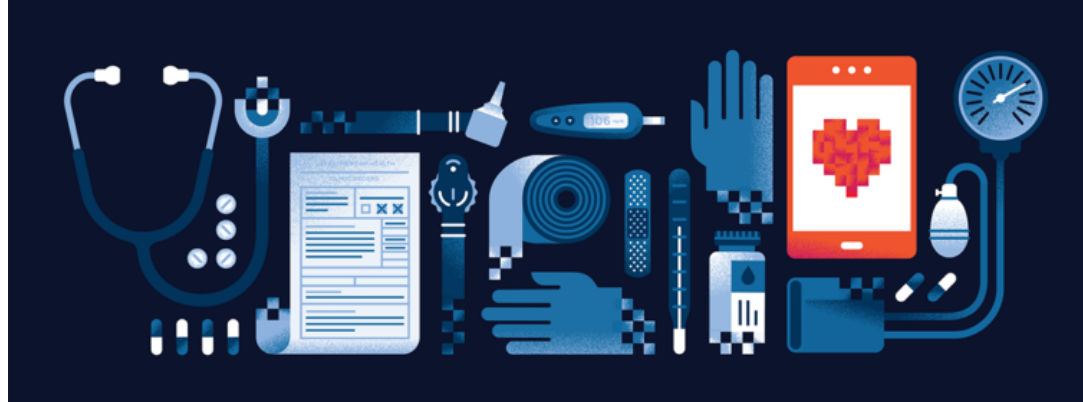

* from https://www.linkedin.com/pulse/machine-learning-prediction-detection-diabetes-vaibhav-singhal/

### This is the first project that I dive into a data analysis and science. In this project I analyse the diabetes dataset.

# Quick look to the data <a id="introduction"></a>
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases in the USA. The purpose of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. In this dataset our target variable is "Outcome".
# Data Exploration <a id="subparagraph1"></a>
***Pregnancies:*** Number of times pregnant

***Glucose:***  Plasma glucose concentration a 2 hours in an oral glucose tolerance test.

This is a lab test to check how your body handles the sugar. Normal person (2 hr after glucose test) should have less than 140mg/dl

***Blood Pressure:***  Diastolic blood pressure (mm Hg).

Normal values are less than 80.
Stage 1 hypertension: 80-89
Stage 2 hypertension: 90 or more
Hypertensive crisis: 120 or more

***Skin Thickness:*** Triceps skin fold thickness (mm)

For adults the normal values are 2.5 mm for men; 18 mm for women

***Insulin:*** 2-Hour serum insulin (mu U/ml). Insulin is a hormone that helps move blood sugar.

150 mu U/ml is a critical number, in which most people with type 1 or 2 needs insulin theraphy

***BMI:*** Body mass index (weight in kg/(height in m)^2): Assess if a person is overweight or underweight.

Underweight: less than 18.5
Normal weight: 18.5 - 24.9
Overweight: 25-29.9
Obese: over 30.0

***Diabetes pedigree function:*** Provides some information on the history in relatives. This is a measure of genetic influence.

***Age (years)***

***Target variable:*** Outcome 1 indicates having diabetes; 0 indicates not having diabetes.
https://github.com/fonnesbeck/Bios8366/blob/master/data/pima-indians-diabetes.metadata.txt

https://medium.com/analytics-vidhya/analyzing-pima-indian-diabetes-dataset-36d02a8a10e5

# Questions to be answered <a id="paragraph1"></a>
* Pregnancy, glucose, blood pressure, skin thickness, etc. What effect do factors have on being diabetic or not?
* Which variable has the most effet on being diabetic?
* What is the relationship between weight and skin thickness?
* What is the relationship between genetic factor and diabetic?

In [1]:
#Let's Start
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from plotly.offline import init_notebook_mode, iplot
# init_notebook_mode(connected=True)
import plotly.express as px
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [2]:
data = pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")
data.head()
#It is a method that I can use to look data's first rows quickly.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#It is a method that I can use and check if there is any missing information in our dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
#Looking at the data types is a good option to explore before examining the data.
data.dtypes
#data.head(15)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
#It is the method that I use to obtain statistical informations.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
#"Outcome" column type is object but reality it is an boolean type so I should convert to str.
#To do this I used this method.
data["Outcome"] =data["Outcome"].astype(str)
data["Outcome"]

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: object

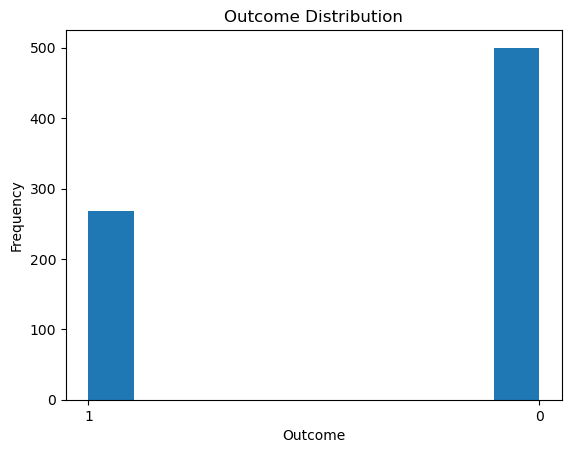

In [7]:
#For better understanding of "Outcome" column I can plot this column with different type of graphs.
plt.hist(data["Outcome"]);
plt.title("Outcome Distribution");
plt.xlabel("Outcome")
plt.ylabel("Frequency");

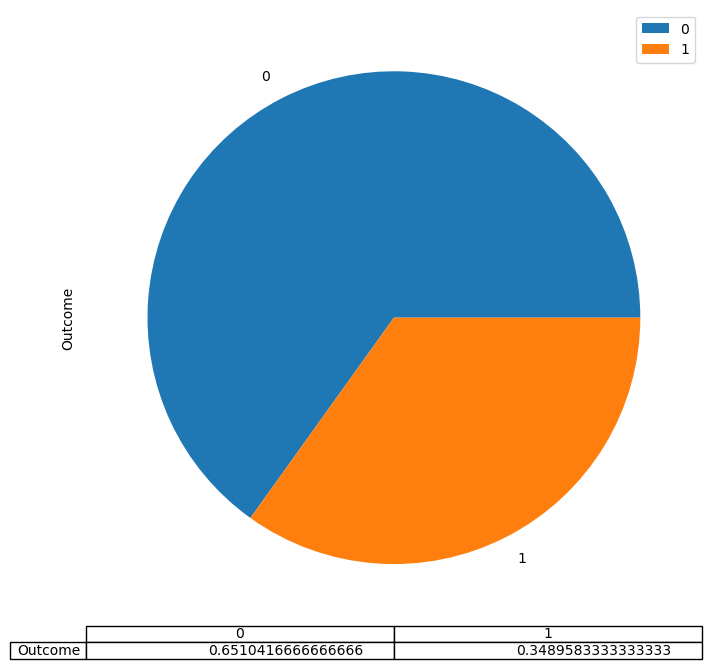

In [8]:
data["Outcome"].value_counts(normalize=True).plot(kind="pie", legend=True, table=True, figsize=(10,8));

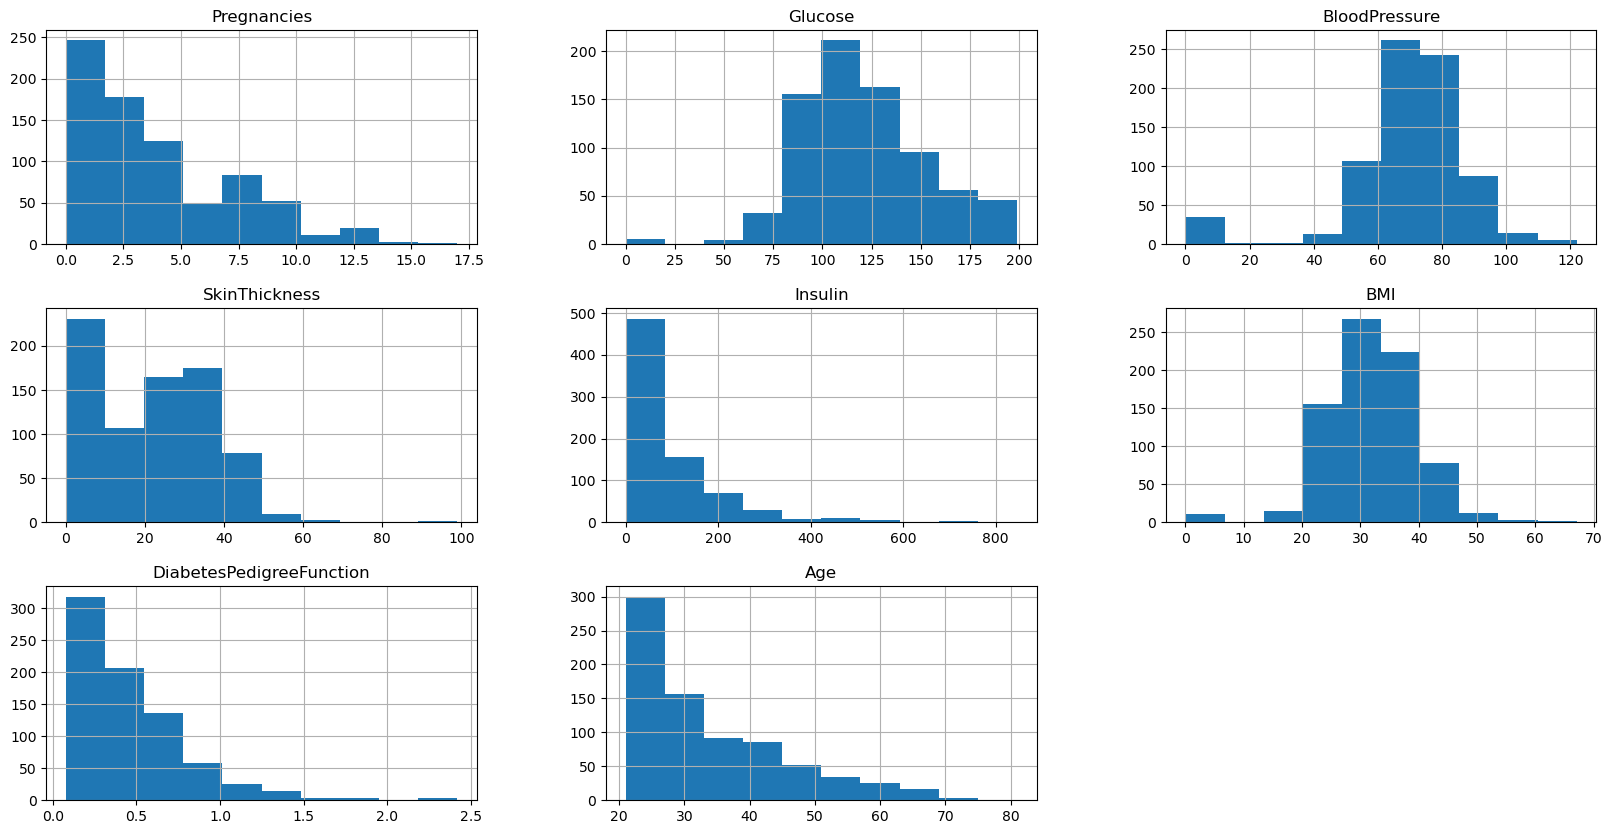

In [9]:
data.hist(figsize=(20,10));

# Feature Engineering & Data Cleaning <a id="paragraph2"></a>
In this part of I found some missing value. The values that does not sound logical according to Data Exploration. For me I found some outlier values. I tried to reshape these values. For example filling the correspondig column with median and mean values. I take out some of these values in my dataset. I will explain these steps clearly so don't worry. 😉😎

In [10]:
data[data["SkinThickness"] > 80]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
579,2,197,70,99,0,34.7,0.575,62,1


In [11]:
#I said that it is not logical where "SkinThickness" is greater than 80 so I updated the dataset with this code.
data = data[data["SkinThickness"] != 99]
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [12]:
data[data["Pregnancies"] > 15]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
159,17,163,72,41,114,40.9,0.817,47,1


In [13]:
#It is not logical that when woman age is 47 and her "Pregnancies" is 17. There is one person is like this.
#I take out this value also
data = data[data["Pregnancies"] < 15]
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [14]:
#Missing values
missing_value = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
missing_value
data[missing_value]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148,72,35,0,33.6
1,85,66,29,0,26.6
2,183,64,0,0,23.3
3,89,66,23,94,28.1
4,137,40,35,168,43.1
...,...,...,...,...,...
763,101,76,48,180,32.9
764,122,70,27,0,36.8
765,121,72,23,112,26.2
766,126,60,0,0,30.1


In [15]:
#I checked the whether these columns has missing values, then I used the numpy where method. 
#If the value in missing information columns is equal to 0, fill them with 'np.nan' so (NaN) if not, write your own value.
data[missing_value] =np.where(data[missing_value] == 0, np.nan, data[missing_value])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 765 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               765 non-null    int64  
 1   Glucose                   760 non-null    float64
 2   BloodPressure             730 non-null    float64
 3   SkinThickness             538 non-null    float64
 4   Insulin                   392 non-null    float64
 5   BMI                       754 non-null    float64
 6   DiabetesPedigreeFunction  765 non-null    float64
 7   Age                       765 non-null    int64  
 8   Outcome                   765 non-null    object 
dtypes: float64(6), int64(2), object(1)
memory usage: 59.8+ KB


In [16]:
#The method that I can control whether the columns have null values.
data.isnull().any()

Pregnancies                 False
Glucose                      True
BloodPressure                True
SkinThickness                True
Insulin                      True
BMI                          True
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [17]:
data = data.reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               765 non-null    int64  
 1   Glucose                   760 non-null    float64
 2   BloodPressure             730 non-null    float64
 3   SkinThickness             538 non-null    float64
 4   Insulin                   392 non-null    float64
 5   BMI                       754 non-null    float64
 6   DiabetesPedigreeFunction  765 non-null    float64
 7   Age                       765 non-null    int64  
 8   Outcome                   765 non-null    object 
dtypes: float64(6), int64(2), object(1)
memory usage: 53.9+ KB


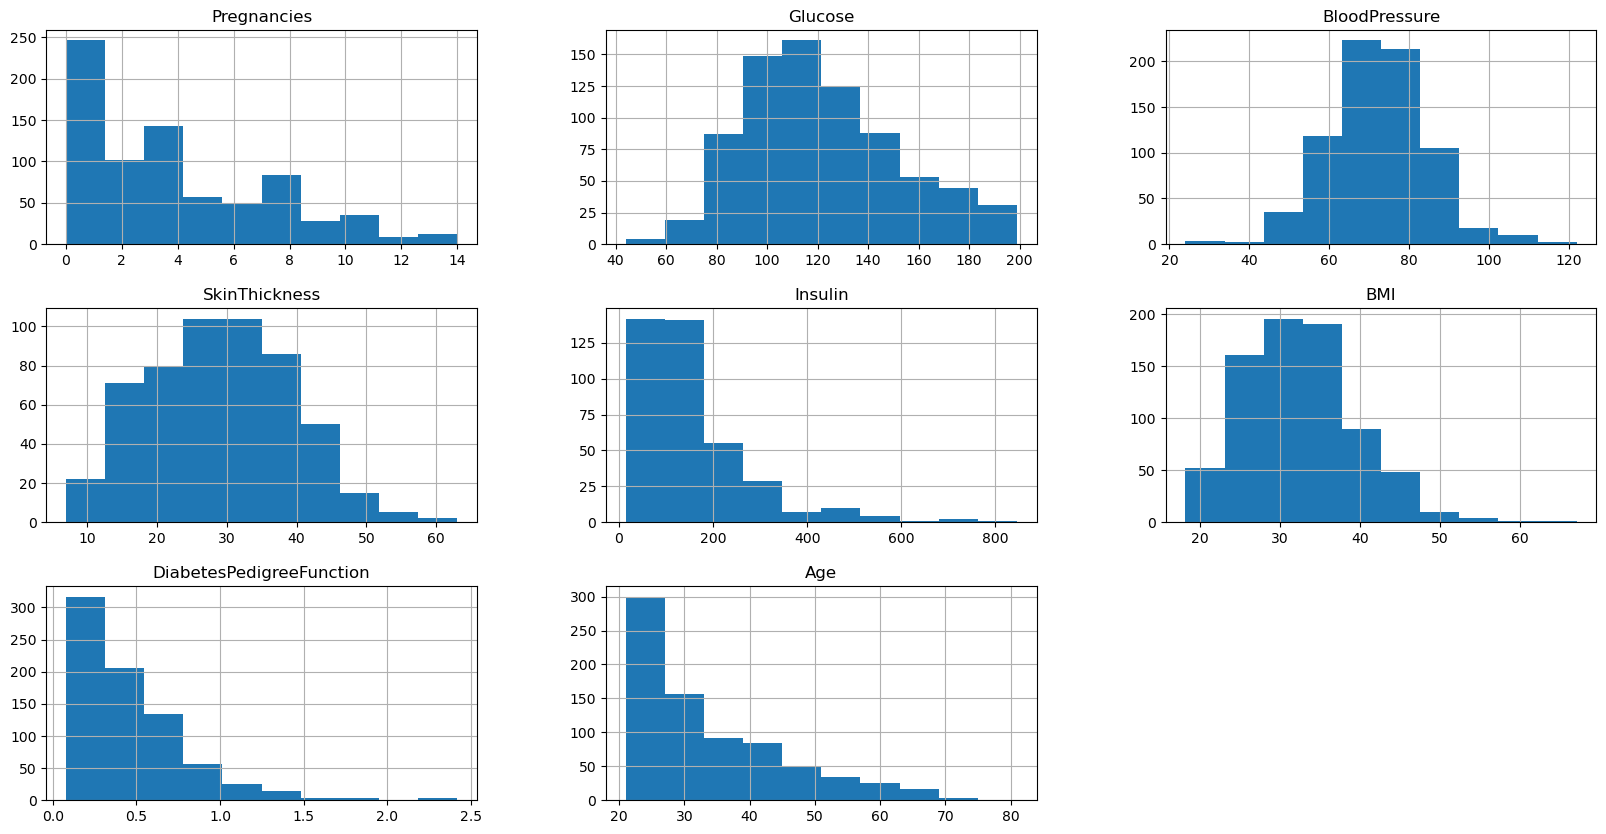

In [18]:
data.hist(figsize=(20,10));

In [19]:
#Feature Engineering
data["Age"].describe()

count    765.000000
mean      33.172549
std       11.721195
min       21.000000
25%       24.000000
50%       29.000000
75%       40.000000
max       81.000000
Name: Age, dtype: float64

In [20]:
# If I have "Age" column, I can think categorization with that age column. Like grouping with 10 years apart.
data["age_bins"] = pd.cut(x=data["Age"],bins = [20,30,40,50,60,70,80,90])
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_bins
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,"(40, 50]"
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,"(30, 40]"
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,"(30, 40]"
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,"(20, 30]"
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,"(30, 40]"


In [21]:
data["age_bins"].dtype
data["age_bins"] = data["age_bins"].astype(str)
data.age_bins.value_counts()

(20, 30]    417
(30, 40]    157
(40, 50]    111
(50, 60]     54
(60, 70]     24
(70, 80]      1
(80, 90]      1
Name: age_bins, dtype: int64

In [22]:
#Data Cleaning
#When some values is not make sense I can use the method where these values filled with "mean" and "median" values of these columns.
#If I have too much outliers, the best way is filling with the "median" values.
#I will show the difference between the columns that filled by "mean" and "median".

In [23]:
data_half_clean = data.fillna(data.median())
data_half_clean

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_bins
0,6,148.0,72.0,35.0,125.5,33.6,0.627,50,1,"(40, 50]"
1,1,85.0,66.0,29.0,125.5,26.6,0.351,31,0,"(30, 40]"
2,8,183.0,64.0,29.0,125.5,23.3,0.672,32,1,"(30, 40]"
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,"(20, 30]"
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,"(30, 40]"
...,...,...,...,...,...,...,...,...,...,...
760,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0,"(60, 70]"
761,2,122.0,70.0,27.0,125.5,36.8,0.340,27,0,"(20, 30]"
762,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0,"(20, 30]"
763,1,126.0,60.0,29.0,125.5,30.1,0.349,47,1,"(40, 50]"


In [24]:
data_clean = data.fillna(data.groupby(['age_bins', 'Outcome', 'Pregnancies']).transform('median'))
data_clean

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_bins
0,6,148.0,72.0,35.0,263.0,33.6,0.627,50,1,"(40, 50]"
1,1,85.0,66.0,29.0,73.0,26.6,0.351,31,0,"(30, 40]"
2,8,183.0,64.0,37.0,170.0,23.3,0.672,32,1,"(30, 40]"
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,"(20, 30]"
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,"(30, 40]"
...,...,...,...,...,...,...,...,...,...,...
760,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0,"(60, 70]"
761,2,122.0,70.0,27.0,94.0,36.8,0.340,27,0,"(20, 30]"
762,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0,"(20, 30]"
763,1,126.0,60.0,28.5,160.0,30.1,0.349,47,1,"(40, 50]"


In [25]:
data_clean.isnull().any()
#I saw that missing_values list ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"] has null values.

Pregnancies                 False
Glucose                     False
BloodPressure                True
SkinThickness                True
Insulin                      True
BMI                          True
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
age_bins                    False
dtype: bool

In [26]:
data.groupby(["age_bins","Outcome", "Pregnancies"]).head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_bins
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,"(40, 50]"
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,"(30, 40]"
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,"(30, 40]"
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,"(20, 30]"
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,"(30, 40]"
...,...,...,...,...,...,...,...,...,...,...
744,1,81.0,74.0,41.0,57.0,46.3,1.096,32,0,"(30, 40]"
754,0,123.0,72.0,NaN,NaN,36.3,0.258,52,1,"(50, 60]"
756,6,190.0,92.0,NaN,NaN,35.5,0.278,66,1,"(60, 70]"
759,9,89.0,62.0,NaN,NaN,22.5,0.142,33,0,"(30, 40]"


In [27]:
data[data.age_bins == '(60, 70]'].groupby(['age_bins', 'Outcome', 'Pregnancies']).head().sort_values(by = ['Outcome', 'Pregnancies'])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_bins
292,0,161.0,50.0,NaN,NaN,21.9,0.254,65,0,"(60, 70]"
535,0,57.0,60.0,NaN,NaN,21.7,0.735,67,0,"(60, 70]"
454,1,135.0,54.0,NaN,NaN,26.7,0.687,62,0,"(60, 70]"
261,3,142.0,80.0,15.0,NaN,32.4,0.200,63,0,"(60, 70]"
477,4,132.0,86.0,31.0,NaN,28.0,0.419,63,0,"(60, 70]"
122,5,132.0,80.0,NaN,NaN,26.8,0.186,69,0,"(60, 70]"
147,5,147.0,78.0,NaN,NaN,33.7,0.218,65,0,"(60, 70]"
359,5,158.0,70.0,NaN,NaN,29.8,0.207,63,0,"(60, 70]"
360,5,103.0,108.0,37.0,NaN,39.2,0.305,65,0,"(60, 70]"
681,5,136.0,82.0,NaN,NaN,NaN,0.640,69,0,"(60, 70]"


In [28]:
data[(data.Outcome =='0') & (data.age_bins == '(20, 30]') & (data.Pregnancies == 0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_bins
59,0,105.0,64.0,41.0,142.0,41.5,0.173,22,0,"(20, 30]"
83,0,101.0,65.0,28.0,NaN,24.6,0.237,22,0,"(20, 30]"
101,0,125.0,96.0,NaN,NaN,22.5,0.262,21,0,"(20, 30]"
135,0,100.0,70.0,26.0,50.0,30.8,0.597,21,0,"(20, 30]"
136,0,93.0,60.0,25.0,92.0,28.7,0.532,22,0,"(20, 30]"
...,...,...,...,...,...,...,...,...,...,...
679,0,95.0,64.0,39.0,105.0,44.6,0.366,22,0,"(20, 30]"
694,0,99.0,NaN,NaN,NaN,25.0,0.253,22,0,"(20, 30]"
710,0,134.0,58.0,20.0,291.0,26.4,0.352,21,0,"(20, 30]"
724,0,141.0,84.0,26.0,NaN,32.4,0.433,22,0,"(20, 30]"


In [29]:
data_clean[(data_clean.Outcome =='0') & (data_clean.age_bins == '(20, 30]') & (data_clean.Pregnancies == 0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_bins
59,0,105.0,64.0,41.0,142.0,41.5,0.173,22,0,"(20, 30]"
83,0,101.0,65.0,28.0,115.0,24.6,0.237,22,0,"(20, 30]"
101,0,125.0,96.0,28.0,115.0,22.5,0.262,21,0,"(20, 30]"
135,0,100.0,70.0,26.0,50.0,30.8,0.597,21,0,"(20, 30]"
136,0,93.0,60.0,25.0,92.0,28.7,0.532,22,0,"(20, 30]"
...,...,...,...,...,...,...,...,...,...,...
679,0,95.0,64.0,39.0,105.0,44.6,0.366,22,0,"(20, 30]"
694,0,99.0,70.0,28.0,115.0,25.0,0.253,22,0,"(20, 30]"
710,0,134.0,58.0,20.0,291.0,26.4,0.352,21,0,"(20, 30]"
724,0,141.0,84.0,26.0,115.0,32.4,0.433,22,0,"(20, 30]"


In [30]:
data[(data.Outcome =='0') & (data.age_bins == '(60, 70]')]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_bins
122,5,132.0,80.0,NaN,NaN,26.8,0.186,69,0,"(60, 70]"
147,5,147.0,78.0,NaN,NaN,33.7,0.218,65,0,"(60, 70]"
221,7,142.0,60.0,33.0,190.0,28.8,0.687,61,0,"(60, 70]"
261,3,142.0,80.0,15.0,NaN,32.4,0.200,63,0,"(60, 70]"
292,0,161.0,50.0,NaN,NaN,21.9,0.254,65,0,"(60, 70]"
359,5,158.0,70.0,NaN,NaN,29.8,0.207,63,0,"(60, 70]"
360,5,103.0,108.0,37.0,NaN,39.2,0.305,65,0,"(60, 70]"
454,1,135.0,54.0,NaN,NaN,26.7,0.687,62,0,"(60, 70]"
477,4,132.0,86.0,31.0,NaN,28.0,0.419,63,0,"(60, 70]"
487,8,194.0,80.0,NaN,NaN,26.1,0.551,67,0,"(60, 70]"


In [31]:
#Group the data according to these three parameters, and after grouping them,
#fill in the other empty columns with the median value of the respective age groups of those columns.
data_clean = data_clean.fillna(data_clean.groupby(['age_bins', 'Outcome', 'Pregnancies']).transform('median'))
data_clean

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_bins
0,6,148.0,72.0,35.0,263.0,33.6,0.627,50,1,"(40, 50]"
1,1,85.0,66.0,29.0,73.0,26.6,0.351,31,0,"(30, 40]"
2,8,183.0,64.0,37.0,170.0,23.3,0.672,32,1,"(30, 40]"
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,"(20, 30]"
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,"(30, 40]"
...,...,...,...,...,...,...,...,...,...,...
760,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0,"(60, 70]"
761,2,122.0,70.0,27.0,94.0,36.8,0.340,27,0,"(20, 30]"
762,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0,"(20, 30]"
763,1,126.0,60.0,28.5,160.0,30.1,0.349,47,1,"(40, 50]"


In [32]:
data_clean.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure                True
SkinThickness                True
Insulin                      True
BMI                          True
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
age_bins                    False
dtype: bool

In [33]:
#There is only one person in these conditions and since this value is empty, I cannot fill the "Insulin" and "SkinThickness" value here with a median value.
data[(data.Outcome =='0') & (data.age_bins == '(60, 70]') & (data.Pregnancies == 1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_bins
454,1,135.0,54.0,NaN,NaN,26.7,0.687,62,0,"(60, 70]"


In [34]:
#Same situation is here.
data[(data.Outcome =='0') & (data.age_bins == '(70, 80]') & (data.Pregnancies == 2)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_bins
451,2,119.0,NaN,NaN,NaN,19.6,0.832,72,0,"(70, 80]"


In [35]:
#I saw NaN values in this condition.
data[(data.Outcome =='0') & (data.age_bins == '(20, 30]') & (data.Pregnancies == 0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_bins
59,0,105.0,64.0,41.0,142.0,41.5,0.173,22,0,"(20, 30]"
83,0,101.0,65.0,28.0,NaN,24.6,0.237,22,0,"(20, 30]"
101,0,125.0,96.0,NaN,NaN,22.5,0.262,21,0,"(20, 30]"
135,0,100.0,70.0,26.0,50.0,30.8,0.597,21,0,"(20, 30]"
136,0,93.0,60.0,25.0,92.0,28.7,0.532,22,0,"(20, 30]"
...,...,...,...,...,...,...,...,...,...,...
679,0,95.0,64.0,39.0,105.0,44.6,0.366,22,0,"(20, 30]"
694,0,99.0,NaN,NaN,NaN,25.0,0.253,22,0,"(20, 30]"
710,0,134.0,58.0,20.0,291.0,26.4,0.352,21,0,"(20, 30]"
724,0,141.0,84.0,26.0,NaN,32.4,0.433,22,0,"(20, 30]"


In [36]:
#I check by looking at our data_clean to see if the above empty values are filled. 
#And I see that the empty columns are filled. 
#For example,"Insulin" value of 115.0 because the empty insulin columns of this group that meet these conditions are filled with the median value of the "Insulin" column of this group.

data_clean[(data_clean.Outcome =='0') & (data_clean.age_bins == '(20, 30]') & (data_clean.Pregnancies == 0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_bins
59,0,105.0,64.0,41.0,142.0,41.5,0.173,22,0,"(20, 30]"
83,0,101.0,65.0,28.0,115.0,24.6,0.237,22,0,"(20, 30]"
101,0,125.0,96.0,28.0,115.0,22.5,0.262,21,0,"(20, 30]"
135,0,100.0,70.0,26.0,50.0,30.8,0.597,21,0,"(20, 30]"
136,0,93.0,60.0,25.0,92.0,28.7,0.532,22,0,"(20, 30]"
...,...,...,...,...,...,...,...,...,...,...
679,0,95.0,64.0,39.0,105.0,44.6,0.366,22,0,"(20, 30]"
694,0,99.0,70.0,28.0,115.0,25.0,0.253,22,0,"(20, 30]"
710,0,134.0,58.0,20.0,291.0,26.4,0.352,21,0,"(20, 30]"
724,0,141.0,84.0,26.0,115.0,32.4,0.433,22,0,"(20, 30]"


In [37]:
#I narrowed the grouping to get rid of the NaN values.
data_clean = data_clean.fillna(data_clean.groupby(['age_bins', 'Outcome']).transform('median'))
data_clean.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_bins
0,6,148.0,72.0,35.0,263.0,33.6,0.627,50,1,"(40, 50]"
1,1,85.0,66.0,29.0,73.0,26.6,0.351,31,0,"(30, 40]"
2,8,183.0,64.0,37.0,170.0,23.3,0.672,32,1,"(30, 40]"
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,"(20, 30]"
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,"(30, 40]"


In [38]:
data_clean.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure                True
SkinThickness                True
Insulin                      True
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
age_bins                    False
dtype: bool

In [39]:
data_clean = data_clean.fillna(data_clean.groupby(['Outcome']).transform('median'))

In [40]:
data[(data.Outcome =='0') & (data.age_bins == '(70, 80]')]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_bins
451,2,119.0,NaN,NaN,NaN,19.6,0.832,72,0,"(70, 80]"


In [41]:
data_clean[(data_clean.Outcome =='0') & (data_clean.age_bins == '(70, 80]')]
#I saw that NaN values are filled after I narrowed the groupping "Outcome".

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_bins
451,2,119.0,70.0,27.0,100.0,19.6,0.832,72,0,"(70, 80]"


In [42]:
data_clean.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
age_bins                    False
dtype: bool

In [43]:
data_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,765.0,3.815686,3.317219,0.000,1.000,3.000,6.000,14.00
Glucose,765.0,121.481699,30.358024,44.000,99.000,117.000,140.000,199.00
BloodPressure,765.0,72.397386,12.198360,24.000,64.000,72.000,80.000,122.00
SkinThickness,765.0,29.044444,8.961413,7.000,23.000,29.000,35.000,63.00
Insulin,765.0,149.240523,98.651920,14.000,88.000,122.000,176.000,846.00
BMI,765.0,32.421307,6.883376,18.200,27.500,32.100,36.500,67.10
DiabetesPedigreeFunction,765.0,0.471707,0.331522,0.078,0.244,0.371,0.626,2.42
Age,765.0,33.172549,11.721195,21.000,24.000,29.000,40.000,81.00


In [44]:
data_half_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,765.0,3.815686,3.317219,0.000,1.000,3.000,6.000,14.00
Glucose,765.0,121.484967,30.334157,44.000,99.000,117.000,140.000,199.00
BloodPressure,765.0,72.393464,12.119743,24.000,64.000,72.000,80.000,122.00
SkinThickness,765.0,28.997386,8.425373,7.000,25.000,29.000,32.000,63.00
Insulin,765.0,141.011111,86.493963,14.000,122.000,125.500,128.000,846.00
BMI,765.0,32.434444,6.879340,18.200,27.500,32.250,36.500,67.10
DiabetesPedigreeFunction,765.0,0.471707,0.331522,0.078,0.244,0.371,0.626,2.42
Age,765.0,33.172549,11.721195,21.000,24.000,29.000,40.000,81.00


In [45]:
data_corr = data_clean.copy()
data_corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_bins
0,6,148.0,72.0,35.0,263.0,33.6,0.627,50,1,"(40, 50]"
1,1,85.0,66.0,29.0,73.0,26.6,0.351,31,0,"(30, 40]"
2,8,183.0,64.0,37.0,170.0,23.3,0.672,32,1,"(30, 40]"
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,"(20, 30]"
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,"(30, 40]"
...,...,...,...,...,...,...,...,...,...,...
760,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0,"(60, 70]"
761,2,122.0,70.0,27.0,94.0,36.8,0.340,27,0,"(20, 30]"
762,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0,"(20, 30]"
763,1,126.0,60.0,28.5,160.0,30.1,0.349,47,1,"(40, 50]"


In [46]:
data_corr['Outcome'] = data_corr['Outcome'].astype(int)
data_corr.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
age_bins                     object
dtype: object

In [47]:
#It is the method that I can look the correlation between features.
data_corr.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.125841,0.217565,0.108548,0.091245,0.013672,-0.035114,0.548930,0.214506
Glucose,0.125841,1.000000,0.228163,0.188185,0.491978,0.233472,0.137409,0.261291,0.492232
BloodPressure,0.217565,0.228163,1.000000,0.193776,0.106777,0.289215,0.000385,0.334995,0.168725
SkinThickness,0.108548,0.188185,0.193776,1.000000,0.205479,0.542304,0.098242,0.132140,0.250845
Insulin,0.091245,0.491978,0.106777,0.205479,1.000000,0.198760,0.124959,0.250889,0.369187
BMI,0.013672,0.233472,0.289215,0.542304,0.198760,1.000000,0.154425,0.023565,0.311769
DiabetesPedigreeFunction,-0.035114,0.137409,0.000385,0.098242,0.124959,0.154425,1.000000,0.032232,0.174023
Age,0.548930,0.261291,0.334995,0.132140,0.250889,0.023565,0.032232,1.000000,0.232487
Outcome,0.214506,0.492232,0.168725,0.250845,0.369187,0.311769,0.174023,0.232487,1.000000


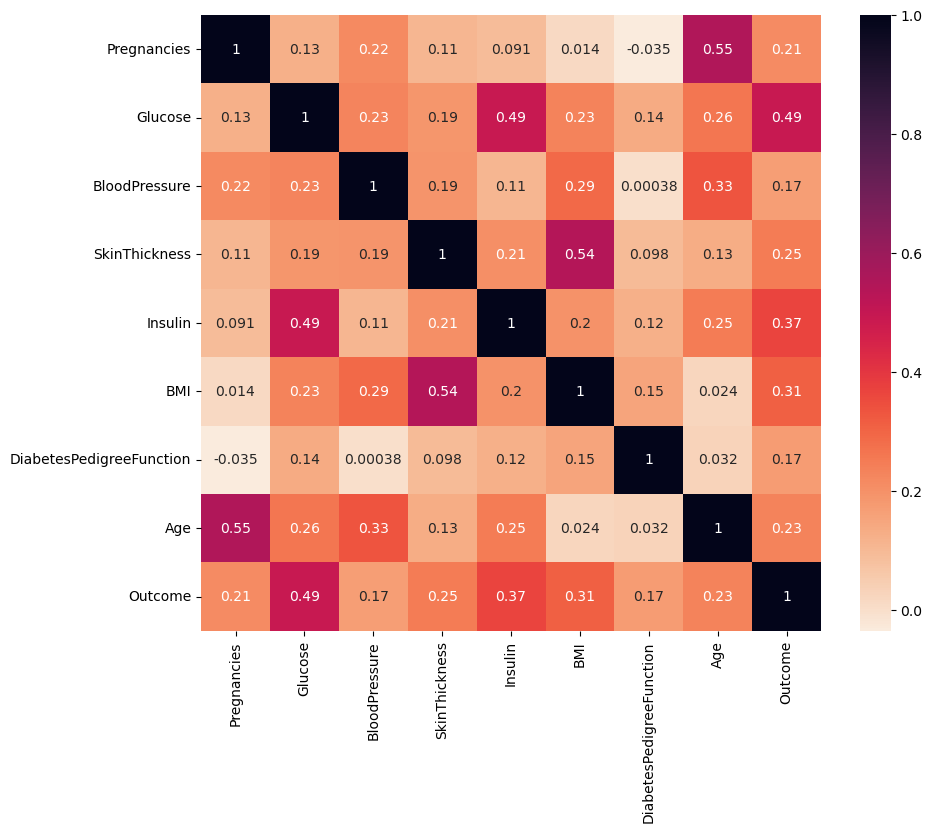

In [48]:
plt.figure(figsize = (10,8)) 

sns.heatmap(data_corr.corr(), cmap ="rocket_r", annot = True);

# Data Visualization & Story Telling <a id="paragraph3"></a>
In this part of this analysis, I will show that difference between the "data_half_clean" & "data_clean". I will answer the questions in the begining using correlaction tables and visualization.

In [49]:
data_clean

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_bins
0,6,148.0,72.0,35.0,263.0,33.6,0.627,50,1,"(40, 50]"
1,1,85.0,66.0,29.0,73.0,26.6,0.351,31,0,"(30, 40]"
2,8,183.0,64.0,37.0,170.0,23.3,0.672,32,1,"(30, 40]"
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,"(20, 30]"
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,"(30, 40]"
...,...,...,...,...,...,...,...,...,...,...
760,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0,"(60, 70]"
761,2,122.0,70.0,27.0,94.0,36.8,0.340,27,0,"(20, 30]"
762,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0,"(20, 30]"
763,1,126.0,60.0,28.5,160.0,30.1,0.349,47,1,"(40, 50]"


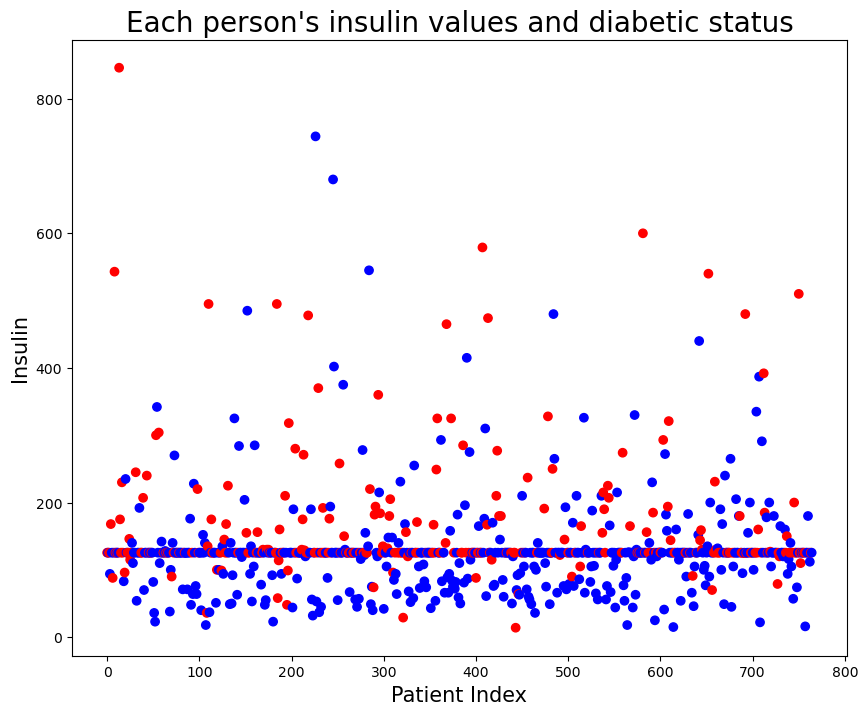

In [50]:
#This the "data_half_clean" that filled with "mean" values.
plt.figure(figsize =(10,8))
colors = {'0': 'blue', '1': 'red'}
plt.scatter(data_half_clean.index, data_half_clean.Insulin, c = data_clean['Outcome'].map(colors))
plt.title("Each person's insulin values and diabetic status", fontsize = 20)
plt.xlabel('Patient Index', fontsize = 15)
plt.ylabel('Insulin', fontsize = 15);

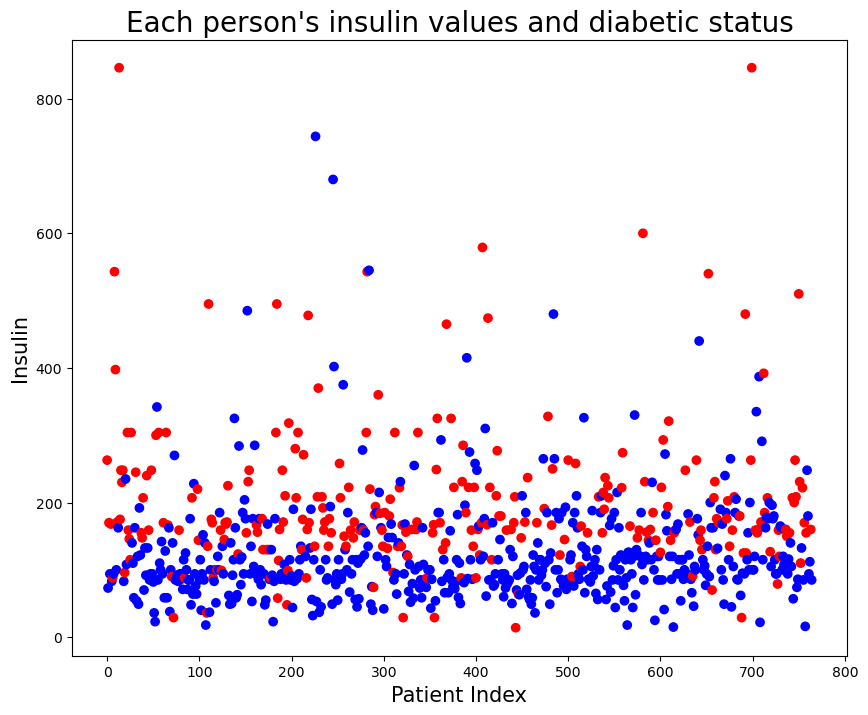

In [51]:
##This is the "data_clean" graph that filled with the "median" values of related columns.
plt.figure(figsize =(10,8))
colors = {'0': 'blue', '1': 'red'}
plt.scatter(data_clean.index, data_clean.Insulin, c = data_clean['Outcome'].map(colors))
plt.title("Each person's insulin values and diabetic status", fontsize = 20)
plt.xlabel('Patient Index', fontsize = 15)
plt.ylabel('Insulin', fontsize = 15);

In [52]:
data_clean = data_clean.reset_index()
data_clean

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_bins
0,0,6,148.0,72.0,35.0,263.0,33.6,0.627,50,1,"(40, 50]"
1,1,1,85.0,66.0,29.0,73.0,26.6,0.351,31,0,"(30, 40]"
2,2,8,183.0,64.0,37.0,170.0,23.3,0.672,32,1,"(30, 40]"
3,3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,"(20, 30]"
4,4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,"(30, 40]"
...,...,...,...,...,...,...,...,...,...,...,...
760,760,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0,"(60, 70]"
761,761,2,122.0,70.0,27.0,94.0,36.8,0.340,27,0,"(20, 30]"
762,762,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0,"(20, 30]"
763,763,1,126.0,60.0,28.5,160.0,30.1,0.349,47,1,"(40, 50]"


In [53]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age_bins
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,"(40, 50]"
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,"(30, 40]"
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,"(30, 40]"
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,"(20, 30]"
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,"(30, 40]"


In [54]:

fig =px.scatter(data, x='Pregnancies', y='Insulin', color='Outcome', color_discrete_sequence= ['red', 'blue'], width= 800, height=400)

fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [55]:
data_insulin = data_clean.groupby('Outcome').agg({'Insulin': 'mean'}).reset_index() 
px.bar(data_insulin, x='Outcome', y='Insulin', color = 'Outcome', title= 'Mean insulin value of diabetic and non-diabetic', width =400)

In [56]:
px.scatter(data_clean, x='BMI', y= 'Insulin', color ='Outcome', color_discrete_sequence =['red','blue'])

In [57]:
#There is an increasing trend between Insulin and Glucose.
px.scatter(data_clean, x='Glucose', y='Insulin',  trendline="ols")

In [58]:
#Here, I can say that as the glucose value increases, the diabetes status of the person increases on average.
px.scatter(data_clean, x= 'index', y= 'Glucose', color ='Outcome', color_discrete_sequence = ['red', 'blue'], title = "Each person's insulin values and diabetic status")

In [59]:
#People with a glucose level higher than 110 are more likely to be diabetic.
data_glucose = data_clean.groupby('Outcome').agg({'Glucose': 'mean'}).reset_index()
px.bar(data_glucose, x='Outcome', y='Glucose', color='Outcome', title= 'Mean glucose value of diabetic and non-diabetic', width=700)

In [60]:
#As the weight (BMI) increases, the skin thickness increases.
#source:https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3897752/#:~:text=Skin%20thickness%20is%20affected%20by%20a%20number%20of%20factors%2C%20including,injections%20and%20transdermal%20delivery%20systems.
px.scatter(data_clean, x='BMI', y= 'SkinThickness', trendline='ols',title='The relation between skin thickness and weight')

# Conclusion <a id="paragraph4"></a>
According to corrlecation table and visualization;
* Being diabetic is mostly related to Glucose, Insulin, BMI.
* There is a high correlation between Glucose and Insulin.
* There is very little relation between Blood Pressure and Genetic factor being a diabetic.

It can be said that; 
* people with low insulin and glucose levels are less likely to be diabetic in general.

* as the BMI value increases, it is observed that an increase in the insulin value.

* as the insulin value increases, the state of being diabetic also increases.